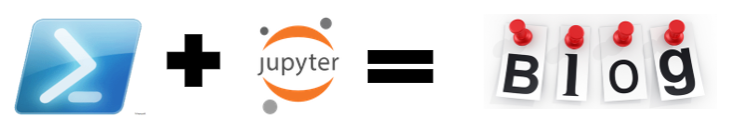

# Table of contents
* ## [What are Jupyter notebooks?](#what)
* ## [Why PowerShell Jupyter notebooks for blogging?](#why)
* ## [How](#how)
  * ### [Prerequisites](#pre)
  * ### [Setup and steps for WordPress.com HTML conversion](#setupandstepswp)
    * #### [Setup](#setupwp)
    * #### [Steps](#stepswp)
  * ### [Steps for Markdown conversion](stepsmd)


In this post I would like to share how one can use PowerShell Jupyter Notebooks with .Net interactive (The .Net interactive Notebook feature has also been recently introduced by the PowerShell team (see [here](https://devblogs.microsoft.com/powershell/public-preview-of-powershell-support-in-jupyter-notebooks/))) as a blogging platform for Wordpress.com or Markdown based static site generators like [Jeykll](https://jekyllrb.com/).  In fact the blog post you are currently reading is entirely based on such a notebook. You can open the notebook and interactively run the PowerShell code using this [link](https://mybinder.org/v2/gh/DBremen/JupyterPowerShell/main?urlpath=lab/tree/Jupyter_PowerShell_Notebooks_based_blogging.ipynb) or start with a new PowerShell notebook from this [link](https://mybinder.org/v2/gh/dotnet/interactive/main?urlpath=lab). While this blog post/notebook will not contain much PowerShell code I'm planning to use this for all my blog posts going forward.

## What are Jupyter notebooks? <a name="what"></a>
If you are not familiar with Jupyter notebooks I would encourage you to go through one of the many free tutorials available like this [one](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook). There are also tons of example Notebooks available (mostly Python) like this [collection](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks). Jupyter Notebook is an open source web application that you can use  to create and share documents. The documents (called notebooks)  usually contain a mix of code and Markdown blocks (including equations,  visualizations, and text). Notebooks can be modified and run interactively within a browser window (within an appropriate execution environment like [Jupyter](https://jupyter.org/try) or Google [Colab](https://colab.research.google.com/)https://colab.research.google.com/) or an IDE (such as VS Code). When executed, the output is also shown within the Notebook.

As an example. Here is just some fun PowerShell code example borrowed from Jeff Hicks [blog](https://jdhitsolutions.com/blog/powershell/7278/friday-fun-powershell-ascii-art/) that was executed within the Notebook:

In [1]:
$text = [System.Uri]::EscapeDataString('Hello World!')
$url = "https://artii.herokuapp.com/make?text=$text&font=big"
Invoke-RestMethod $url -DisableKeepAlive

The below script needs to be able to find the current output cell; this is an easy method to get it.

  _    _      _ _        __          __        _     _ _ 
 | |  | |    | | |       \ \        / /       | |   | | |
 | |__| | ___| | | ___    \ \  /\  / /__  _ __| | __| | |
 |  __  |/ _ \ | |/ _ \    \ \/  \/ / _ \| '__| |/ _` | |
 | |  | |  __/ | | (_) |    \  /\  / (_) | |  | | (_| |_|
 |_|  |_|\___|_|_|\___/      \/  \/ \___/|_|  |_|\__,_(_)
                                                         
                                                         


## Why PowerShell Jupyter notebooks for blogging? <a name="why"></a>

PowerShell as a language is designed as an interactive language since it can be used from the Console and also as a scripting language. Therefore it's just natural to share code examples and their output as part of blogging about PowerShell. With Jupyter Notebooks the output, the code and the text, images (images that are pasted to the Notebook are automatically embedded), equations are all part of one document. A blog post can be written as a Notebook with the ability to interactively modify run and re-run the code. Once the Notebook has been finished the document (.ipynb) can be converted to either HTML (for WordPress.com) or Markdown format (the conversion and steps for Markdown are easier but I'm still somehow sticking with my old WordPress.com blog for now even though I already have one on GitHub pages too) . In addition to the static document one can also share a Notebook hosted on Github through a specific link (all of the steps required will be described in detail) to be run interactively in the browser through [Binder](https://mybinder.org/).

## How? <a name="how"></a>

If you are still with me you are hopefully keen to learn how to do this. I'm assuming that you will host your Jupyter notebook(s) on GitHub to be run interactively via Binder (this is optional otherwise you could just create a notebook save/download and convert it on your machine).

### Prerequisites <a name="preq"></a>

It's actually quite easy once you have setup your environment with all pre-requisites:

- Python (at least v. 3.6)

- Jupyter notebook converters

  - Markdown conversion: based on this [article](https://www.fast.ai/2020/01/20/nb2md/) from fast.ai I can recommend the usage of their nbdev tool 

    `pip install nbdev`

  - Html for WordPress.com (WordPress.com requires the CSS to be inline (inside the HTML elements) conversion: I'm using the excellent python script nb2wp from [here](https://github.com/bennylp/nb2wp). You require the nb2wp.py script and the style.css CSS style sheet from the repository.

    - The script itself has also some dependencies that you will require to install via pip in case you run into errors when executing the script.

    - HTMLAgilityPack for the post-processing of the converted HTML through PowerShell:

      `Install-Package -Name HTMLAgilityPack -ProviderName NuGet -Source 'https://www.nuget.org/api/v2' -Destination $Destination`

- *Optional:* Files to open your notebooks on Binder using the .Net interactive image as described [here](https://github.com/dotnet/interactive/blob/main/docs/CreateBinder.md).

  - A GitHub repo and at least one notebook to share

    - The repo file structure should look something like this:

      [![img](https://user-images.githubusercontent.com/375556/67017073-19137180-f0f1-11e9-9744-b5f8ec532e32.png)](https://user-images.githubusercontent.com/375556/67017073-19137180-f0f1-11e9-9744-b5f8ec532e32.png)

  - **Dockerfile** to create the Binder image (can be downloaded from [here](https://github.com/dotnet/interactive/tree/main/samples/my%20binder))

  - A **Nuget.Config** file to provide package sources needed by your notebooks  (can be downloaded from [here](https://github.com/dotnet/interactive/tree/main/samples/my%20binder))

  - After you have uploaded the files and put a notebook into the notebooks folder you just need to connect the GitHub repo with Binder by going through the setup steps on their [webage](https://mybinder.org/).

### Setup and steps for WordPress.com HTML conversion<a name="setupandstepswp"></a>

#### Setup <a name="setupwp"></a>

With all the prerequisites in place your folder structure should look like this (In addition to the files from the .Net interactive repo I have also added the nb2wp.py script and style.css sheet into the root of the folder the "html" folder is where the converted HTML output will be put):

![image.png](attachment:4f8bb8fd-2fad-452c-9db4-a9be740ee995.png)

I have created another Python script (I'm quite a noob when it comes to Python, please let me know if you know of an easier way to do this) to run the nb2wp.py based on command-line arguments which I take and parse through a PowerShell script (I could have probably written the whole process in PowerShell but didn't feel like re-inventing the wheel). In addition to that the PowerShell script will remove some unwanted Input and Output indications from the Jupyter Notebook, that the Python script didn't take care of. Here are the contents of the Python script (run_nb2wp.py) ...
```python
import sys
from nb2wp import nb2wp
fullname = sys.argv[1]
urlPrefix = sys.argv[2]
outdir = 'html/' + fullname.split(".")[0]
nb2wp(fullname, out_dir=outdir,  remove_attrs=False,img_url_prefix=urlPrefix)
```

... and the PowerShell script (build.ps1) ...

In [1]:
function build {
        [CmdletBinding()]
        param (
            [Parameter(Mandatory)]
            $NotebookName,
            [Parameter(Mandatory)]
            $UrlPostFix,
            $UrlPrefix = 'https://powershellone.files.wordpress.com/'
        )
    $imageUrlPrefix = $UrlPrefix + $UrlPostFix
    if (! $imageUrlPrefix.EndsWith('/')) {  $imageUrlPrefix =  $imageUrlPrefix+ '/'}
    $path = $PSScriptRoot
    Push-Location $path
    $NotebookName = $NotebookName.Replace('.\','')
    $nbPath = (Resolve-Path $NotebookName)
	copy $nbPath notebooks
    $text = Get-Content $nbPath -Raw
    $text = $text.Replace('$','~~')
    $Utf8NoBomEncoding = New-Object System.Text.UTF8Encoding $False
    [System.IO.File]::WriteAllLines($nbPath, $text, $Utf8NoBomEncoding)
    python .\run_nb2wp.py $NotebookName $imageUrlPrefix
    $text = $text.Replace('~~' ,'$')
    $text | Set-Content $nbPath -NoNewline  -Encoding utf8
    Add-Type -Path "C:\scripts\ps1\get-stats\Helper\HtmlAgilityPack.dll" 
    $doc = New-Object HtmlAgilityPack.HtmlDocument
    $htmlName = [System.IO.Path]::ChangeExtension($NotebookName, 'html')
    $htmlFolder = 'html\' + [System.IO.Path]::GetFileNameWithoutExtension($NotebookName)
    $htmlPath = Join-Path (Join-Path $path $htmlFolder) $htmlName
    $text = Get-Content $htmlPath -Raw -Encoding utf8
    $text = $text.Replace('~~' , '$')
    $text | Set-Content $htmlPath -NoNewline  -Encoding utf8
    $result = $doc.Load($htmlPath)
    $result = $doc.DocumentNode.SelectNodes("//div[contains(@class,'prompt')]")
    $result.foreach{$_.remove()}
    $doc.DocumentNode.SelectSingleNode('//body').OuterHtml | Set-Clipboard
    $doc.Save($htmlPath)
    del $nbPath
    Pop-Location
}

The below script needs to be able to find the current output cell; this is an easy method to get it.

which I both saved into the root folder of the repository.

#### Steps <a name="stepswp"></a>

* Put the .ipynb file into the root of your folder.
   * Make sure to save the file before you download it to make sure any pasted images will be embedded.
* Run the build.ps1 script
   * The build function requires to following arguments
      1. NotebookName - The name of the Jupyter Notebook file
      2. UrlPrefix    - This is the first part of the Url that your WordPress blog uses for uploading media (mine is https://powershellone.files.wordpress.com/)
      3. UrlPostFix   - The last part of the Url that your WP blog uses for uploading media. This is usually something like YYYY/MM but you need to test this on your blog.
   * The script then takes the following steps
      1. Sanitize the urlPrefix for the Python script to update the external image locations
      2. Replace '\$' characters by a placehoder sine the conversion has problems dealing with them.
      3. Run the Python script, which will:
         * Convert the file to HTML
         * Extract the external images files
         * Output the HTML file and the images to the html\NAMEOFTHEMARKDOWNFILE and its \img subfolder respectively.
      4. Put the '\$' characters back into the Notebook file
      5. Put the '\$' characters back into the HTML file
      6. Remove the input and output cell indicators from the generated html
      7. Copy the <body> element to the clipboard.
      8. Move the .ipynb file into the \notebooks subfolder
* Upload any images extracted to the 'html\NAMEOFTHEMARKDOWNFILE\img folder to your WordPress blog
* Add the <body> element of the converted HTML content (copied to your clipboard automatically) into a HTML block within your post

### Steps for Markdown conversion<a name="stepsmd"></a>

There is only one setup step which is to create a PowerShell function to update the image src pathes to point to /images folder of your blog. Put the following PowerShell function into the root folder (I called it build.ps1)
```
function build ($MarkdownFilePath){
    $text = Get-Content $MarkdownFilePath  -Raw
    $imgPath = Join-Path (Split-Path $MarkdownFilePath) ([System.IO.Path]::GetFileNameWithoutExtension($MarkdownFilePath))
    $images = dir ($imgPath + '_files\att_[0-9]*.png')
    foreach ($image in $images){
        $toReplace = [regex]::Match($text,'!\[image\.png]\(attachment:[0-9a-f]{8}-.*\.png\)').Value
        $newPath = (Split-path (Split-path $image.FullName) -leaf) + '/' + ($image.Name)
        $replacement = '![image.png](' + $newPath + ')'
        $text = $text.Replace($toReplace, $replacement)
    }
    $text = $text -replace '^(!.*]\()(\w+_files/)', '$1/images/$2'
    $text = [regex]::replace($text, '^(!.*\]\()(\w+_files/)','$1/images/$2','Multiline')
    $text | Set-Content $MarkdownFilePath -NoNewline
}
```

* Put the .ipynb into the root of the folder
* Convert the .ipynb to Markdown using fast.ai's nbdev python based tool `nbdev_nb2md NAMEOFTHENOTEBOOKFILE.ipynb`
* Run the previously created build function `build NAMEOFTHENOTEBOOKFILE.md 
* Copy the generated .md file into your '_posts' folder prefixing it with the required YYYY-MMMM-DD- prefix
* Copy the extracted images folder "NAMEOFTHENOTEBOOKFILE_files" subfolder to your blog's images folder (no prefix here)
* Push the changes to your blog's repo

Happy blogging.